# Lezione di lavoratorio 11
Durante questa lezione è stato proposto un primo approccio alle reti neurali e al machine learning, utilizzando la libreria python Keras.<br>
Una rete neurale è un sistema di percettroni posizionati su vari livelli.<br>
Un percettrone riceve in ingresso vari segnali da quelli nel livello (layer) precedente, ad ognuno dà un peso e restituisce il segnale modificato (a seconda della funzione di attivazione) a quelli nel livello successivo. <br>
L'immagine che segue mostra lo schema di funzionamento di un singolo percettrone (a) e la struttura di una generica rete neurale (b). <br>
![title](nn_img.png)
<br>
La rete viene "allenata" su una serie di dati di ingresso di cui si conosce il risultato desiderato. La rete utilizza questa serie di dati più volte (per più "epoche") per andare a modificare i parametri dei vari nodi della rete, ottimizzandoli per ottenere i risultati desiderati. <br>
Una volta che il training della rete è terminato è possibile validarla ovvero eseguire un test sempre con dati il cui output desiderato è noto per verificarne il funzionamento, ed utilizzarla per predire i risultati dati altri dati di ingresso.<br>

### Esercizio 11.1
Vengono variati alcuni parametri della rete neurale fornita (numero di epoche per il training, il noise sui dati ecc...) per risolvere un problema di fit lineare, con funzione f(x)=2x+1, fornendo dati con un certo rumore.

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 10 samples
Epoch 1/60
500/500 [==============================] - 0s 375us/sample - loss: 3.2777 - mean_squared_error: 3.2777 - val_loss: 2.3724 - val_mean_squared_error: 2.3724
Epoch 2/60
500/500 [==============================] - 0s 35us/sample - loss: 2.4390 - mean_squared_error: 2.4390 - val_loss: 1.7891 - val_mean_squared_error: 1.7891
Epoch 3/60
500/500 [==============================] - 0s 44us/sample - loss: 1.8552 - mean_squared_error: 1.8552 - val_loss: 1.3860 - val_mean_squared_error: 1.3860
Epoch 4/60
500/500 [==============

500/500 [==============================] - 0s 38us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 46/60
500/500 [==============================] - 0s 43us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 47/60
500/500 [==============================] - 0s 36us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 48/60
500/500 [==============================] - 0s 31us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 49/60
500/500 [==============================] - 0s 32us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 50/60
500/500 [==============================] - 0s 33us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 51/60
500/

In [3]:
# return weights
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 43us/sample - loss: 0.0189 - mean_squared_error: 0.0189

Test loss: 0.018885061144828796
Test accuracy: 0.018885061


In [4]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 51us/sample - loss: 1.5835e-04 - mean_squared_error: 1.5835e-04

Test loss: 0.0001583458506502211
Test accuracy: 0.00015834585


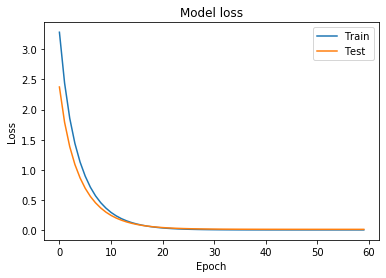

In [5]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

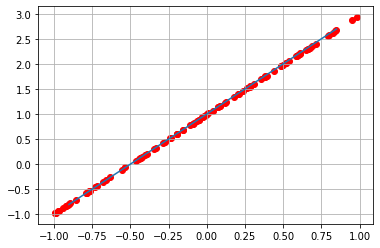

In [6]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Esercizio 11.2
La stessa cosa è stata fatta per il fit di $f(x)=4-3x-2x^2+3x^3$ con $x \in [-1,1]$.

Using TensorFlow backend.


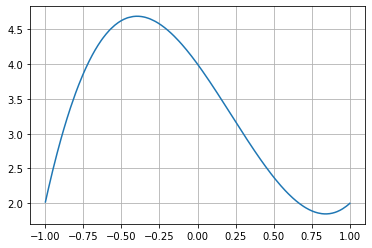

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras import optimizers, losses, metrics
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(1,)))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='elu'))
model.add(Dense(1))
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
sigma = 0.0
y_target = 4 -  3 * x_valid - 2 * x_valid** 2 + 3 * x_valid**3
y_valid = np.random.normal(4 -  3 * x_valid - 2 * x_valid** 2 + 3 * x_valid**3, sigma)
y_train = 4 -  3 * x_train - 2 * x_train** 2 + 3 * x_train**3
plt.plot(x_valid,y_target)
plt.grid(True)
plt.show()

In [8]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               2500      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 28,599
Trainable params: 28,599
Non-trainable params: 0
__________________________________________________

In [9]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 500 samples
Epoch 1/40
5000/5000 [==============================] - 1s 242us/sample - loss: 0.6606 - mean_squared_error: 0.6606 - val_loss: 0.1012 - val_mean_squared_error: 0.1012
Epoch 2/40
5000/5000 [==============================] - 1s 147us/sample - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 3/40
5000/5000 [==============================] - 1s 163us/sample - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 4/40
5000/5000 [==============================] - 1s 148us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 5/40
5000/5000 [==============================] - 1s 147us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 6/40
5000/5000 [==============================] - 1s 139us/sample - loss: 0.0285 - mean_squared_error: 0.02

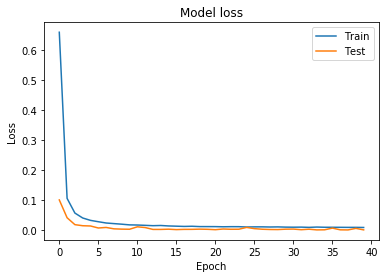

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

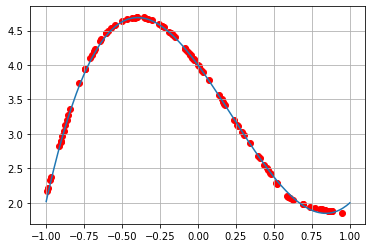

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Lo stesso problema viene risolto con un'altra rete neurale più semplice:

In [12]:
model2 = tf.keras.Sequential()
model2.add(Dense(4, input_shape=(1,)))
model2.add(Dense(25, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(2, activation='elu'))
model2.add(Dense(1))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_7 (Dense)              (None, 25)                125       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 78        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 222
Trainable params: 222
Non-trainable params: 0
________________________________________________________

In [13]:
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 500 samples
Epoch 1/40
5000/5000 [==============================] - 1s 257us/sample - loss: 0.6030 - mean_squared_error: 0.6030 - val_loss: 0.1551 - val_mean_squared_error: 0.1551
Epoch 2/40
5000/5000 [==============================] - 1s 145us/sample - loss: 0.2111 - mean_squared_error: 0.2111 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 3/40
5000/5000 [==============================] - 1s 151us/sample - loss: 0.1512 - mean_squared_error: 0.1512 - val_loss: 0.0627 - val_mean_squared_error: 0.0627
Epoch 4/40
5000/5000 [==============================] - 1s 132us/sample - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 5/40
5000/5000 [==============================] - 1s 127us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 6/40
5000/5000 [==============================] - 1s 120us/sample - loss: 0.1029 - mean_squared_error: 0.10

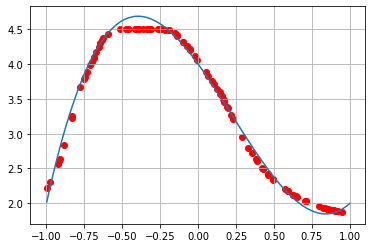

In [14]:
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()